In [1]:
#importing modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, gmaps, os, re, datetime
import scipy.stats as st



In [2]:
#Loading Cleaned CSV
cleaned_wine = "../Output/wine_cleaned.csv"
wine_df = pd.read_csv(cleaned_wine)

wine_df.head()

country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87    NaN   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   

            province             region_1         taster_name  \
0  Sicily & Sardinia                 Etna       Kerin O’Keefe   
1              Douro                  NaN          Roger Voss   
2             Oregon    Willamette Valley        Paul Gregutt   
3           Michigan  Lake Michigan Shore  Alexander Peartree   
4             Oregon    Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  Wine_Year  
0     White Blend              Nicosia       2013  
1  Portuguese Red  Quinta dos Avidagos       2011  
2      Pinot Gris            Rainstorm       2013  
3        Riesling           St. Julian       2013  
4      Pinot Noir         Sweet Cheeks       2012

In [3]:
wine_df.count()

country                  129908
description              129908
points                   129908
price                    120916
province                 129908
region_1                 108724
taster_name              103664
taster_twitter_handle     98695
title                    129908
variety                  129907
winery                   129908
Wine_Year                129908
dtype: int64

In [4]:
#Droping rows with no reviewer for Bias Comparison
wine_df = wine_df.dropna(subset=['taster_name'])
wine_df.head()


country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87    NaN   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   

            province             region_1         taster_name  \
0  Sicily & Sardinia                 Etna       Kerin O’Keefe   
1              Douro                  NaN          Roger Voss   
2             Oregon    Willamette Valley        Paul Gregutt   
3           Michigan  Lake Michigan Shore  Alexander Peartree   
4             Oregon    Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  Wine_Year  
0     White Blend              Nicosia       2013  
1  Portuguese Red  Quinta dos Avidagos       2011  
2      Pinot Gris            Rainstorm       2013  
3        Riesling           St. Julian       2013  
4      Pinot Noir         Sweet Cheeks       2012

In [5]:
#Creating secondary data frame to drop countries with less than 1000 wine reviews
filtered = wine_df.groupby('country')['country'].filter(lambda x: len(x) >= 1000)
fixed_df = wine_df[wine_df['country'].isin(filtered)]

## Figure 1 Reviewers Per Country

### Countries with less than a 1000 wines reviewed were dropped
### There are 101172 wine reviews being analysed

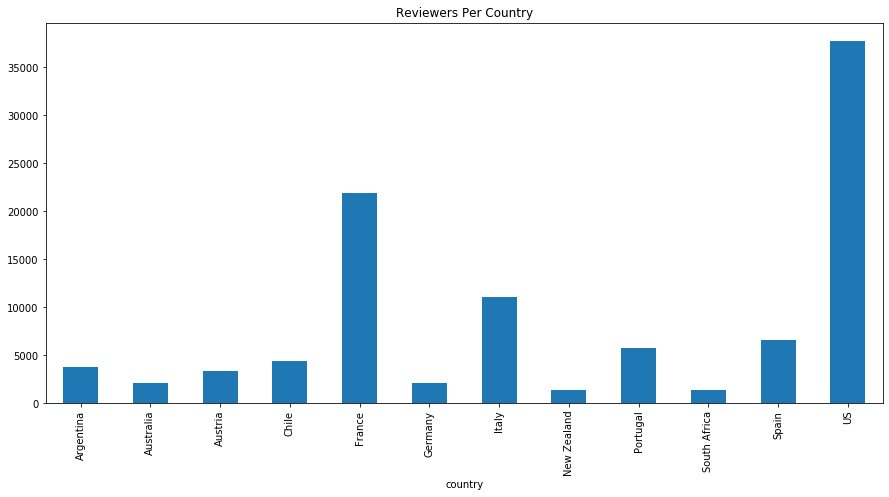

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
fixed_df.groupby('country').count()['taster_name'].plot.bar(ax=ax,y="Number of reviewers", title="Reviewers Per Country")

* The US has the most wines reviewed, even more than France and Italy combined
* Only 9 countries have more than 1000 wines reviewed

In [7]:
#Filter out reviewers who reviewed less than 1000 wines
filtered = wine_df.groupby('taster_name')['taster_name'].filter(lambda x: len(x) >= 1000)
fixed1_df = wine_df[wine_df['taster_name'].isin(filtered)]

## Figure 2 Amount of Reviews per Taster

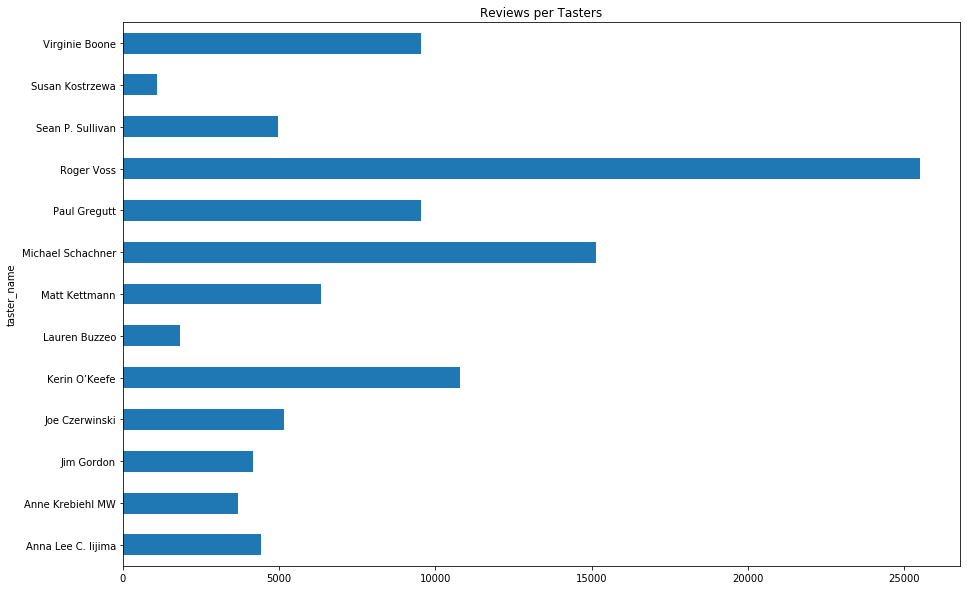

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
fixed1_df.groupby('taster_name').count()['country'].plot.barh(ax=ax, title="Reviews per Tasters")

In [ ]:
* There are 14 reviewer who had more than 1000 reviews

## Figure 3 Wine Scores from Reviewers

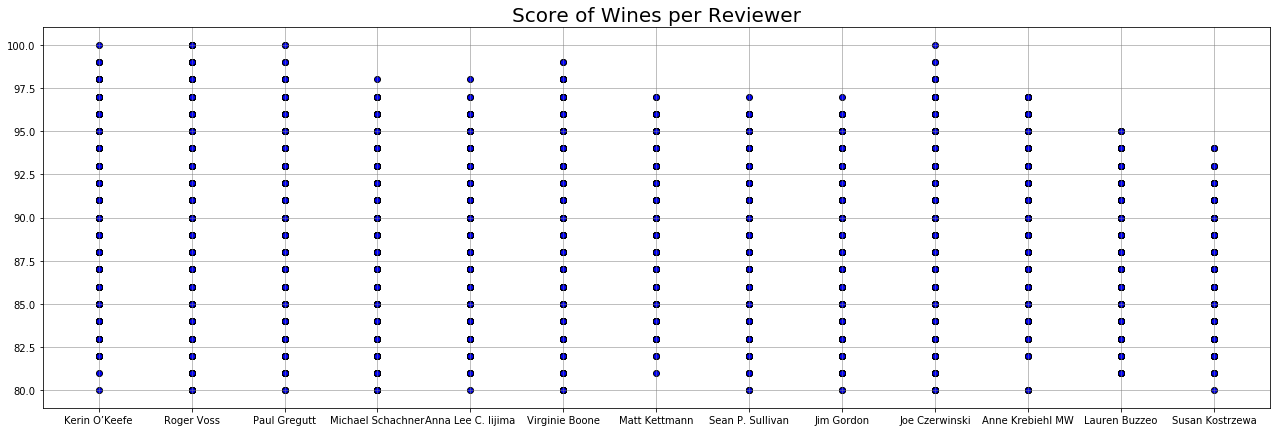

In [9]:
plt.figure(figsize=(22,7))
plt.title("Score of Wines per Reviewer", fontsize = 20)
review_points = fixed1_df['points']
reviewers = fixed1_df['taster_name']

plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.scatter(reviewers,review_points, color='blue',edgecolor='black')
plt.show()

* In terms of scoring there appears to be no bias found in the scoring of wines
* Roger Voss was the leader in the number of wines reviewed
* A score of 80 was the lowest score given

## Figure 4 Average Score Per Wine Taster

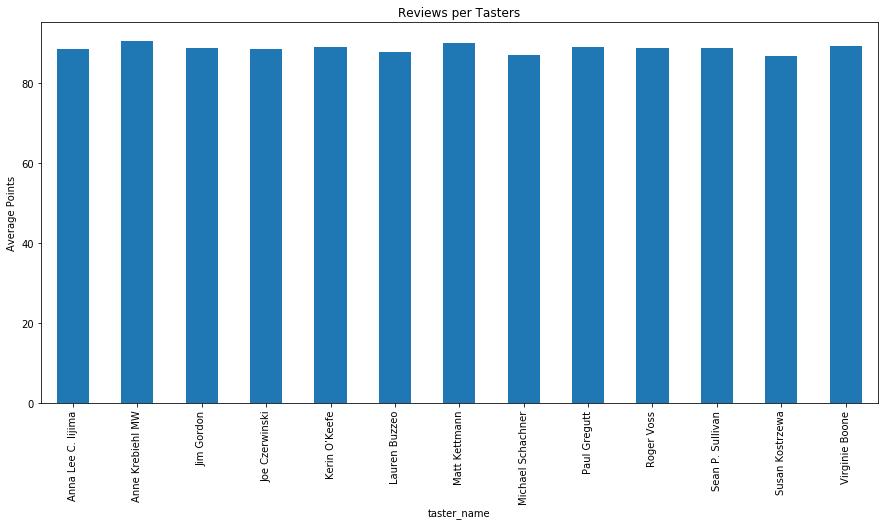

In [33]:
fixed2_df = wine_df[wine_df['taster_name']== 'Roger Voss']
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("Tasters")
ax.set_ylabel("Average Points")
fixed1_df.groupby('taster_name').mean()['points'].plot.bar(title="Average Score per Taster")

* The region of the wine's origin does not have an impact on the score of it
* As in Figure #3 all reviewers have given out similar scores with no outliers even the number of reviews drastically differ from each reviewer